In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

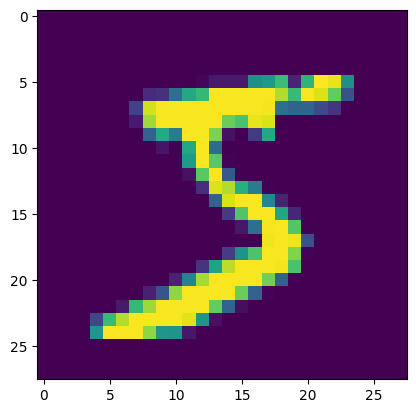

In [9]:
plt.imshow(X_train[0])

In [12]:
#Satndaedize Values
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #higher dimensional arrays covert into one_di array 1x784
model.add(Dense(128, activation='relu')) #perfomace best 784 input--> 128 input_layer --> 10 hidden_output_layer --> y
model.add(Dense(10, activation='softmax')) #more than 1 output node in MLP use softmax function

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
#sparse_categorical_crossentropy vs. categorical_crossentropy --> in CC we need one hot encode for data
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [18]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2) #20% of data drive different for purpose of validation

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.2765 - val_loss: 0.6510
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5402 - val_loss: 0.4303
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4155 - val_loss: 0.3599
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3650 - val_loss: 0.3270
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3372 - val_loss: 0.3066
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3180 - val_loss: 0.2897
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3032 - val_loss: 0.2789
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2908 - val_loss: 0.2695
Epoch 9/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2799 - val_loss: 0.2603
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.269

In [20]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred = y_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9226

#Some Changes

In [25]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #higher dimensional arrays covert into one_di array 1x784
model.add(Dense(128, activation='relu')) #perfomace best 784 input--> 128 input_layer --> 10 hidden_output_layer --> y
model.add(Dense(32, activation='relu')) #add more 32 hidden layers
model.add(Dense(10, activation='softmax')) #more than 1 output node in MLP use softmax function

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#sparse_categorical_crossentropy vs. categorical_crossentropy --> in CC we need one hot encode for data
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [28]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2) #20% of data drive different for purpose of validation

Epoch 1/25
1500/1500 [==============================] - 11s 6ms/step - loss: 1.0454 - val_loss: 0.5670
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5054 - val_loss: 0.4114
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4043 - val_loss: 0.3715
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3634 - val_loss: 0.3257
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3339 - val_loss: 0.2989
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3065 - val_loss: 0.2755
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2818 - val_loss: 0.2540
Epoch 8/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2591 - val_loss: 0.2483
Epoch 9/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2398 - val_loss: 0.2217
Epoch 10/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.22

In [29]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
y_pred = y_prob.argmax(axis=1)

In [31]:
accuracy_score(y_test,y_pred)

0.9657

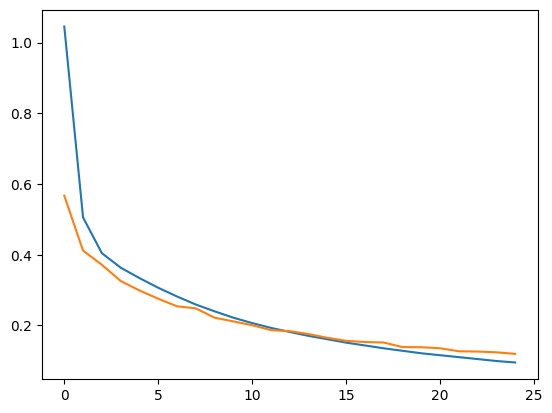

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [35]:
#plt.plot(history.history['accuracy'])
#overfitting  accuracy > val_accuracy

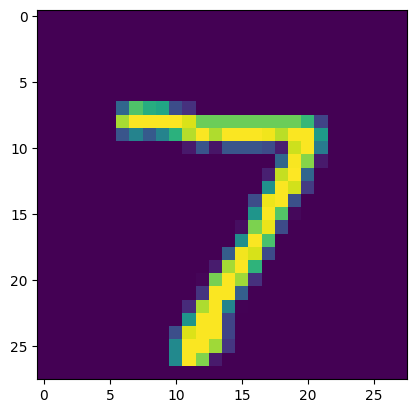

In [36]:
plt.imshow(X_test[0])

In [37]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 67ms/step


array([[1.6436371e-06, 3.3078283e-07, 2.2553334e-04, 6.2368005e-03,
        1.2666163e-09, 7.2005361e-07, 3.1276842e-13, 9.9352336e-01,
        1.3522368e-06, 1.0242475e-05]], dtype=float32)

In [38]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([7])

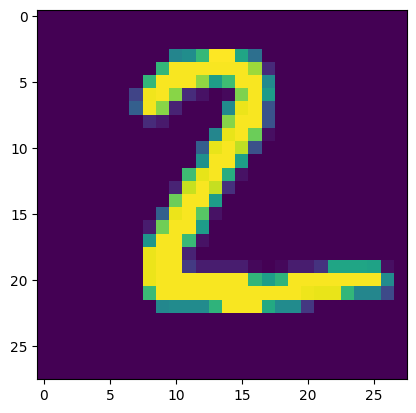

In [39]:
plt.imshow(X_test[1])


In [40]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([2])